## Selección de datos de tablas

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'putos')

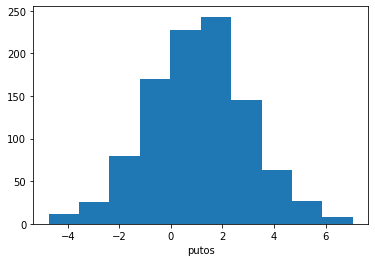

In [12]:
n = np.random.normal(1,2,1000)
plt.hist(n)
plt.xlabel("putos")

In [59]:
import pandas as pd
mail = pd.read_csv('https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/mail.csv')
mail

,t,srcuser,srchost,dstuser,dsthost,size
0,2006-05-11 10:15:08,barb,saturn,tricia,mars,58274
1,2006-05-12 12:48:13,tricia,mars,gene,venus,194925
2,2006-05-12 15:02:49,phil,mars,phil,saturn,1048
3,2006-05-13 13:59:18,barb,saturn,tricia,venus,271
4,2006-05-14 09:31:37,gene,venus,barb,mars,2291
5,2006-05-14 11:52:17,phil,mars,tricia,saturn,5781
6,2006-05-14 14:42:21,barb,venus,barb,venus,98151
7,2006-05-14 17:03:01,tricia,saturn,phil,venus,2394482
8,2006-05-15 07:17:48,gene,mars,gene,saturn,3824
9,2006-05-15 08:50:57,phil,venus,phil,venus,978


In [47]:
[row.split(",") for row in mail]

[[''], ['srcuse'], ['srchos'], ['dstuse'], ['dsthos'], ['siz']]

## Selección de columnas

In [ ]:
[[row[0], row[2], row[3], row[4], row[1], row[5]] for row in mail]

In [50]:
#Selección de filas

[[row[0], row[1], row[3], row[4]] for row in mail if row[2]=="venus"]

In [ ]:
#Elimina los "\n al final de cada string"
mail = [row[0:-1] for row in mail]


In [51]:
mail = mail[1:] #Separa los nombres y los datos

In [52]:
import re
[[row[0], row[1], row[2]] for row in mail if re.search("^s", row[2])]


['srcuse', 'srchos', 'dstuse', 'dsthos', 'siz']

In [ ]:
[[row[0], row[1], row[2]] for row in mail if row[1] == "barb" and row[3] == "tricia"]

## Combinación de Columnas

In [ ]:
[[row[0], row[1] + "@" + row[2], row[3] + "@" + row[4]] for row in mail]


# Selección condicional

In [ ]:
[row for row in mail if float(row[5])/1024 > 500]

### Remoción de duplicados

In [ ]:
[row[1] for row in mail]

In [ ]:
len(set([row[1] for row in mail]))

## Manejo de NULL

In [ ]:
taxpayer = open("files/taxpayer.csv").readlines()
taxpayer = [row[0:-1] for row in taxpayer]
taxpayer = [row.split(",") for row in taxpayer]
taxpayer

In [ ]:
taxpayer = [ [element if element != "NULL" else None for element in row] for row in taxpayer]

In [ ]:
[[row for row in taxpayer if row[1] is not None]]

## Ordenamiento

In [53]:
from operator import itemgetter
sorted([row for row in mail if int(row[5]) > 100000], key=itemgetter(5))


In [ ]:
mail = [[element if index != 5 else int(element) for index, element in enumerate(row)] for row in mail]


In [60]:
sorted([row for row in mail if int(row[5]) > 100000], key=itemgetter(5))

(0, 't')
(1, 'srcuser')
(2, 'srchost')
(3, 'dstuser')
(4, 'dsthost')
(5, 'size')


### Joins

In [ ]:
profile_contact = open("files/profile_contact.csv", "r").readlines()
profile_contact = profile_contact[1:]
profile_ontact = [row[0:-1] for row in profile_contact]
profile_contact = [row.split(",") for row in profile_contact]
profile_contact

In [ ]:
profile0 = [[str(idx)] + row for idx, row in enumerate(profile)]
profile0

In [ ]:
[[row_pc[0], row_p[1], row_pc[1]] for row_p in profile0 for row_pc in profile_contact if row_p[0] == row_pc[0]]


In [ ]:
[row_pc for row_pc in profile_contact if row_pc[0] in [row_p[0] for row_p in porfile0 if row_p[1] == "Mort"]]


## Selección del principio o el final

In [ ]:
profile[:5]

In [ ]:
profile[-5:]

## Selección en el medio

In [ ]:
profile[3:8]

## Realización de cómputos

In [61]:
data = [[1, 2], [3, 4], [5, 6], [7, 8]]
data

[[1, 2], [3, 4], [5, 6], [7, 8]]

In [62]:
[row[0] * row[1] for row in data]

[2, 12, 30, 56]

## Cadenas de Caracteres


### Mayúsculas / Minúsculas

In [ ]:
limbs = open("files/limbs.csv", "r").readlines()
limbs = limbs[1:]
limbs = [row[0:-1] for row in limbs]
limbs = [row.split(",") for row in limbs]
limbs

In [ ]:
[[row[0].upper(), row[0].lower(), row[0].capitalize()] for row in limbs]

### Búsqueda de patrones

In [64]:
metals = [[x] for x in "copper, gold, iron, lead, mercury, platinum, silver, tin".split(",")]
metals

[['copper'],
 [' gold'],
 [' iron'],
 [' lead'],
 [' mercury'],
 [' platinum'],
 [' silver'],
 [' tin']]

In [67]:
## cadenas que inician con "c"
import re
[[row[0]] for row in metals if re.search("^co", row[0])]

[['copper']]

In [68]:
## cadenas que finalizan con "er"
[[row[0]] for row in metals if re.search("er$", row[0])]

[['copper'], [' silver']]

In [69]:
## cadenas que contiene pp a partir de la segunda posición
[[row[0]] for row in metals if re.search("^pp", row[0][2:])]

[['copper']]

In [70]:
## cadenas que no contienen i
[[row[0]] for row in metals if not re.search("i", row[0])]

[['copper'], [' gold'], [' lead'], [' mercury']]

In [72]:
## Las primeras 3 letras de cada string
[[row[0][:3]] for row in metals]

[['cop'], [' go'], [' ir'], [' le'], [' me'], [' pl'], [' si'], [' ti']]

In [73]:
## cadenas que empiezan con una vocal que terminan en "ir"
[[row[0]] for row in metals if re.search("^[aeiou]|er$", row[0])]

[['copper'], [' silver']]

### Fechas y Horas

### Extracción de partes

In [1]:
import time, datetime
datetime.date.today()

datetime.date(2020, 10, 28)

In [2]:
datetime.date.today().isoformat()

'2020-10-28'

In [3]:
datetime.date.today().strftime("%y/%m/%d")

'20/10/28'

In [4]:
datetime.datetime.now().isoformat(" ")

'2020-10-28 08:54:28.518314'

In [5]:
datetime_val = open("files/datetime_val.csv", "r").readlines()
datetime_val = datetime_val[1:]
datetime_val = [row[0:-1] if row[-1] == "\n" else row for row in datetime_val]
datetime_val = [row.split(",") for row in datetime_val]
datetime_val

NameError: name 'da' is not defined

In [6]:
# Se debe redefinir estas funciones de acuerdo
#con el formato particular de la fecha y la hora en los datosh

In [9]:
def YEAR(s):
    return datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").strftime("%Y")

def MONTH(s):
    #Numero del mes
    return datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").month
def MONTHNAME(s):
    return datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").strftime("%B")

def MONTHNAME_ABBR(s):
    return datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").strftime("%b")

def DAYOFMONTH(s):
    return datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").strftime("%d")
def DAYNAME(s):
    return datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").strftime("%A")
def DAYNAME_ABBR(s):
    return datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").strftime("%a")
def WEEKDAY(s):
    return datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").strftime("%w")
def DAYOFYEAR(s):
    return datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").strftime("%J")
def WEEKOFYEAR(s):
    return datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").strftime("%W")



In [10]:
[[row[0], YEAR(row[0]), MONTH(row[0]), MONTHNAME(row[0]), MONTHNAME_ABBR(row[0])] for row in datetime]

NameError: name 'datetime_val' is not defined

In [ ]:
[[row[0], DAYOFMONTH(row[0]), DAYNAME(row[0]), DAYNAME_ABBR(row[0])] for row in datetime_val]

In [11]:
## Se deben redefinir estas funciones de acuerdo con
## el formato particular de la fechar y hora en los datos

def HOUR(s):
    return datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").strftime("%H")

def MINUTE(s):
    return datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").strftime("%M")

def SECOND(s):
    return datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").strftime("%S")


In [ ]:


[[row[0], HOUR(row[0]), MINUTE(row[0]), SECOND(row[0])] for row in datetime_val]

In [ ]:
[[row[0], datetime.datetine.strptime(row[0], "%Y-%m-%d %H:%M:%S").strftime("%d/%m/%y")] for row in datetime_val]

## Cómputos con fechas

In [ ]:
## Intervalos
[[datetime.datetime.now() - datetime.datetime.strptime(row[0], "%Y-%m-%d %H:%M:%S")] for row in datetime_val]

In [12]:
##Otro ejemplo
x = datetime.datetime.strptime("2018-09-30", "%Y-%m-%d")
y = datetime.datetime.strptime("2018-09-01", "%Y-%m-%d")
y - x

datetime.timedelta(days=-29)

In [13]:
y + datetime.timedelta(days=5)

datetime.datetime(2018, 9, 6, 0, 0)

In [14]:
## Suma 60 horas a cada fecha
[[(datetime.datetime.strptime(row[0], "%Y-%m-%d %H:%M:%S") +
  datetime.timedelta(hours=60)).isoformat(" ")] for row in datetime_val]


NameError: name 'datetime_val' is not defined

In [ ]:
## Calcula la edad
x = [[(datetime.datetime.now() - datetime.datetime.strptime(row[0], "%Y-%m-%d %H:%M:%S"))] for row in datetime_val]

In [ ]:
[[int(row[0].days / 365)] for row in x]

## Resumenes 

## Valores únicos

In [15]:
## valores únicos
set([row[1] for row in mail])

NameError: name 'mail' is not defined

In [ ]:
len(set([row[1] for row in mail]))

## Búsqueda del máximo o el mínimo

In [ ]:
[row for row in limbs[:-1] if int(row[1]) == max(int(x[1]) for x in limbs[:-1] )]

## Agrupamientos

In [ ]:
import itertools
from operator import itemgetter

for key, group in itertools.groupby(sorted(mail, key=itemgetter(1)), itemgetter(1)):
    print(key)
    for g in group:
        print(" ", g)

In [ ]:
## Cuenta el numero de elementos por grupo
[[key, len(list(group))] for key, group in intertools.groupby(sorted(mail, key=itemgetter(1)), itemgetter(1))]